In [1]:
!pip install diagrams cairosvg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from diagrams import Cluster, Diagram, Edge
from diagrams.aws.compute import EC2
from diagrams.azure.compute import VM
from diagrams.custom import Custom
from diagrams.gcp.analytics import BigQuery, Composer, DataCatalog, Dataflow, PubSub
from diagrams.gcp.compute import ComputeEngine, Functions
from diagrams.gcp.ml import AIHub
from diagrams.gcp.network import PartnerInterconnect
from diagrams.gcp.storage import Storage
from diagrams.onprem.analytics import Dbt, Tableau
from diagrams.onprem.compute import Server

In [3]:
import base64 as b64
import cairosvg
from functools import partial
from io import StringIO
from pathlib import Path
from urllib.request import urlretrieve


def svg2png(source, output_path):
    func = partial(
        cairosvg.svg2png,
        write_to=output_path,
        output_height=128,
        output_width=128,
    )

    if isinstance(source, str):
        return func(url=source)
    else:
        return func(source)


def download(url, output_path):
    urlretrieve(url, output_path)


Path("resources/").mkdir(parents=True, exist_ok=True)
fivetran_b64 = "PHN2ZyB3aWR0aD0iMTMwIiBoZWlnaHQ9IjE4MSIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIj48cGF0aCBkPSJNODkuNyA5MC4zaDE4LjFjMS41IDAgMi42LTEuMiAyLjYtMi42IDAtLjMtLjEtLjYtLjItLjlMNzkgMS44Qzc4LjYuOCA3Ny42LjEgNzYuNS4xaC0xOGMtMS41IDAtMi42IDEuMi0yLjYgMi42IDAgLjMuMS42LjIuOWwzMS4yIDg1Yy40IDEgMS4zIDEuNyAyLjQgMS43em0tMy4yIDkwLjJoMTguMWMxLjUgMCAyLjYtMS4yIDIuNi0yLjcgMC0uMy0uMS0uNi0uMi0uOEw0Mi43IDEuN0M0Mi4zLjcgNDEuMyAwIDQwLjIgMEgyMi4xYy0xLjUgMC0yLjYgMS4yLTIuNiAyLjYgMCAuMy4xLjYuMi45TDg0IDE3OC44Yy40IDEgMS40IDEuNyAyLjUgMS43em0tMzUuNyAwaDE4LjFjMS41IDAgMi42LTEuMiAyLjYtMi42IDAtLjMtLjEtLjYtLjItLjlMNDAuMiA5MmMtLjQtMS0xLjQtMS43LTIuNS0xLjdIMTkuNmMtMS41IDAtMi42IDEuMi0yLjYgMi42IDAgLjMuMS42LjIuOWwzMS4yIDg1Yy4zIDEgMS4zIDEuNyAyLjQgMS43em00MS4xLTE3N2wxNC42IDM5LjljLjQgMSAxLjQgMS43IDIuNSAxLjdoMTguMWMxLjUgMCAyLjYtMS4yIDIuNi0yLjYgMC0uMy0uMS0uNi0uMi0uOUwxMTUgMS43Yy0uNC0xLTEuNC0xLjctMi41LTEuN0g5NC40Yy0xLjUgMC0yLjYgMS4yLTIuNiAyLjYgMCAuMyAwIC43LjEuOXptLTc0LjYgMTc3aDE4LjFjMS41IDAgMi42LTEuMiAyLjYtMi42IDAtLjMtLjEtLjYtLjItLjlsLTE0LjYtMzkuOWMtLjQtMS0xLjQtMS43LTIuNS0xLjdIMi42Yy0xLjUgMC0yLjYgMS4yLTIuNiAyLjYgMCAuMy4xLjYuMi45bDE0LjYgMzkuOWMuNCAxIDEuNCAxLjcgMi41IDEuN3oiIGZpbGw9IiMwMDdGRkYiLz48L3N2Zz4=".encode("ascii")
fivetran_icon = b64.b64decode(fivetran_b64)
svg2png(fivetran_icon, output_path="resources/fivetran.png")

download("https://lh3.googleusercontent.com/tQfGrHF0EktOqP5rHQxO7mbX_62dS2vYdE-D2X6eQXRvEX8xmMfXnKsfVGjesjbRXWkC4GcCBYC5Gi-VXg_p=w128-h128", "resources/dlp.png")

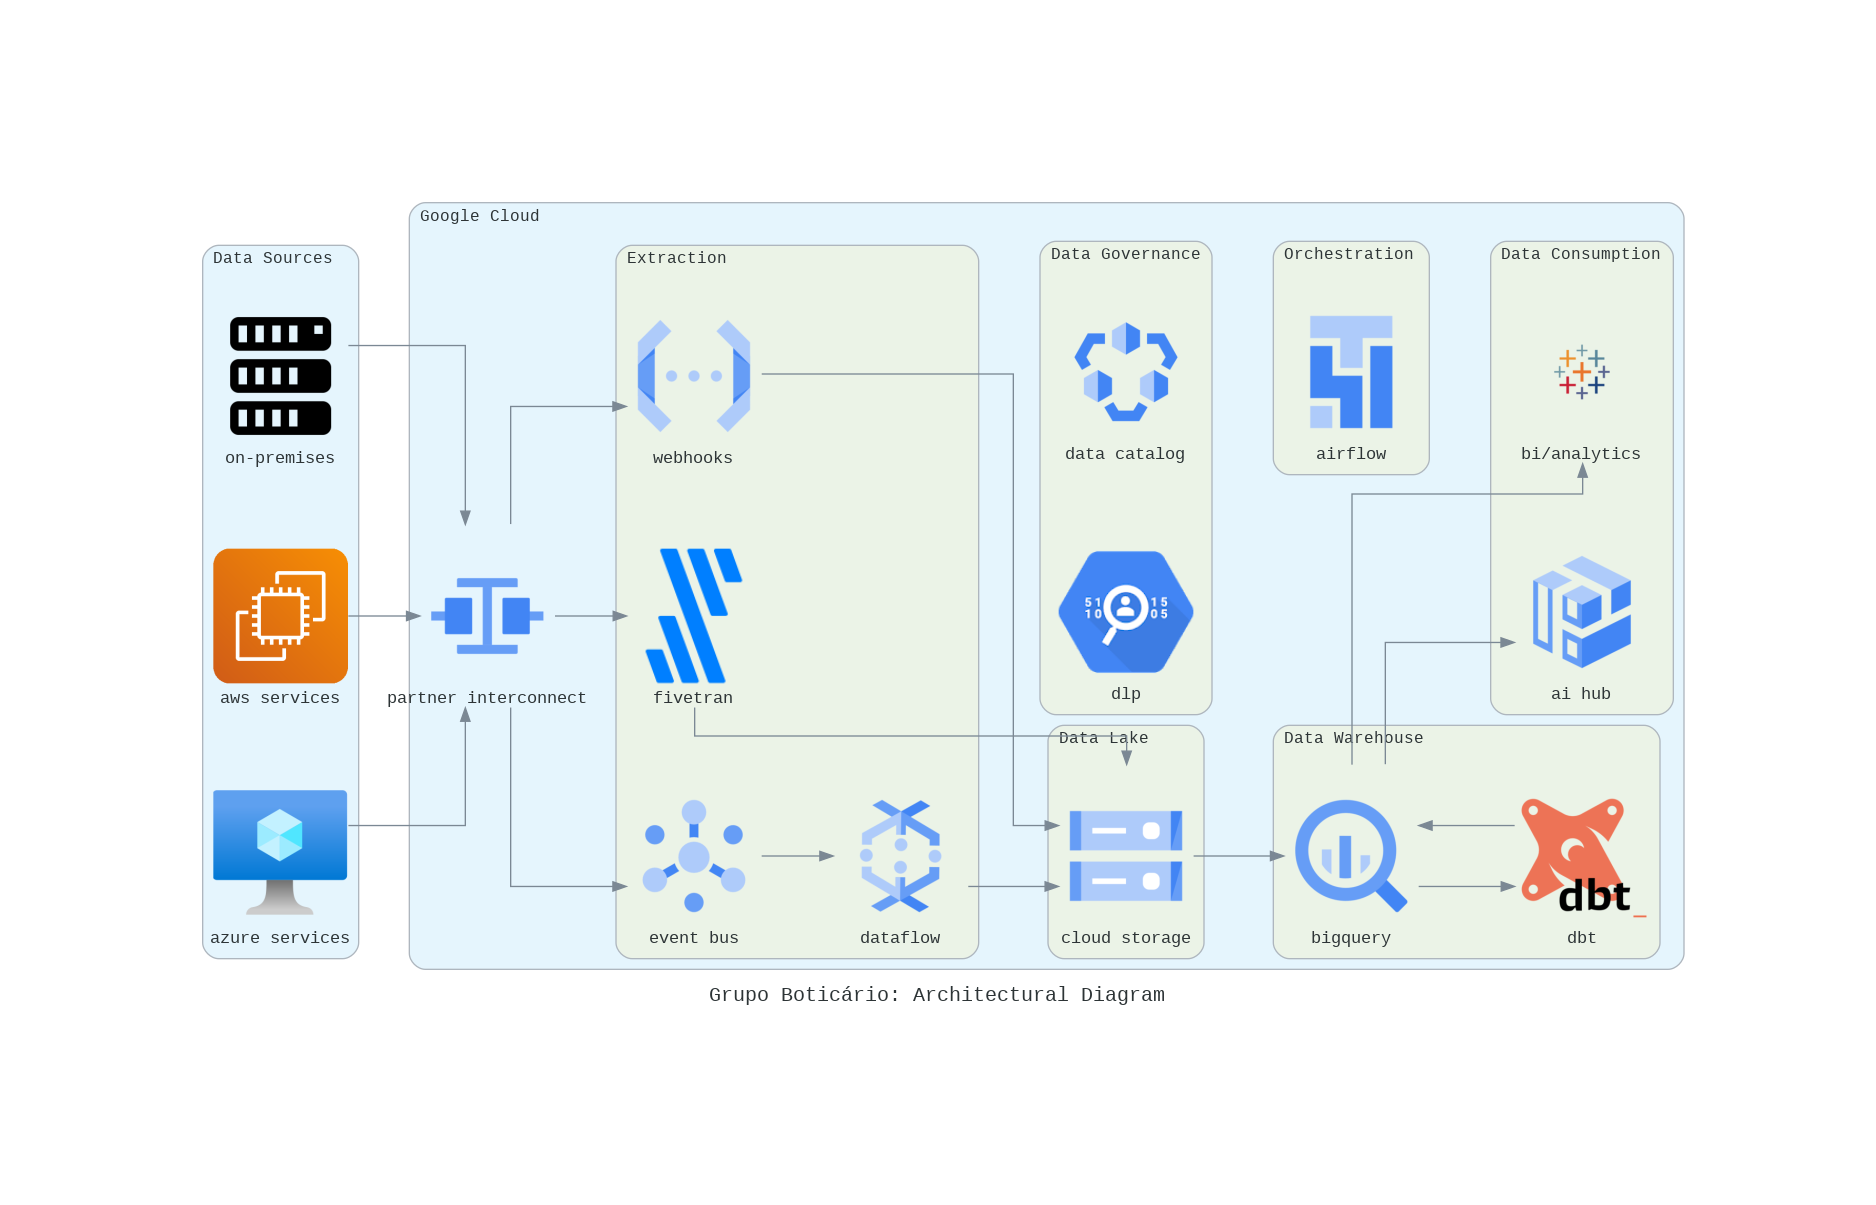

In [4]:
# pyright: reportUnusedExpression=false

attr = {
    "layout": "dot",
    "compound": "true",
}

with Diagram("Grupo Boticário: Architectural Diagram", graph_attr=attr) as d:
    with Cluster("Data Sources"):
        ds = [
            Server("on-premises"),
            EC2("aws services"),
            VM("azure services"),
        ]

    with Cluster("Google Cloud"):
        di = PartnerInterconnect("partner interconnect")

        with Cluster("Extraction"):
            fivetran = Custom("fivetran", "resources/fivetran.png")
            wh = Functions("webhooks")
            psub = PubSub("event bus")
            df = Dataflow("dataflow")

            psub >> df

        with Cluster("Data Lake"):
            dl = Storage("cloud storage")
        
        with Cluster("Data Warehouse"):
            bq = BigQuery("bigquery")
            dbt = Dbt("dbt")

            bq >> dbt
            dbt >> bq

        with Cluster("Data Consumption"):
            bi = Tableau("bi/analytics")
            ai = AIHub("ai hub")

        with Cluster("Data Governance"):
            dlp = Custom("dlp", "resources/dlp.png")
            dc = DataCatalog("data catalog")

        with Cluster("Orchestration"):
            airflow = Composer("airflow")


    ds >> di >> [fivetran, wh, psub]
    [df, wh, fivetran] >> dl >> bq >> [ai, bi]

    # adjust positioning with invisible edges
    dlp >> Edge(style="invis") >> bq
    dc >> Edge(style="invis") >> airflow

d